In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import us_states
import fancy_heatmap

In [2]:
state_dict = dict(map(reversed, us_states.abbrev_us_state.items()))

In [3]:
data_covid_07_09_raw = pd.read_csv('../data/state_snapshot.csv', index_col=0)

In [4]:
data_alex_raw = pd.read_csv('../data/sme.csv', index_col=0)

In [5]:
# What do I want to do

# I want to combine these two dataframes and comnbine them together
# I want to plot some of this data out and see if there are any relationships or correlations


# things I could plot
# ratio of population that is infected to the current number of cases + number of deaths
# 

# I want a pairplot
# I want to plot the relationship of covid cases to the mask sentinemt of the state
# I want the probability of contracting covid per state

In [6]:
data_covid = data_covid_07_09_raw.copy()

In [7]:
data_mask_political = data_alex_raw.copy()

In [8]:
data_covid.head()

,date,state,fips,cases,deaths
6614,2020-07-01,Alabama,1,38962,972
6615,2020-07-01,Alaska,2,1174,12
6616,2020-07-01,Arizona,4,84152,1726
6617,2020-07-01,Arkansas,5,21197,277
6618,2020-07-01,California,6,239764,6168


In [9]:
data_covid_sept_1_cumsum = data_covid[data_covid['date'] == '2020-09-01'].copy()

In [10]:
data_covid_july_1_cumsum = data_covid[data_covid['date'] == '2020-07-01'].copy()

In [11]:
data_covid_july_1_cumsum.head()

,date,state,fips,cases,deaths
6614,2020-07-01,Alabama,1,38962,972
6615,2020-07-01,Alaska,2,1174,12
6616,2020-07-01,Arizona,4,84152,1726
6617,2020-07-01,Arkansas,5,21197,277
6618,2020-07-01,California,6,239764,6168


In [12]:
data_covid_sept_1_cumsum.head()

,date,state,fips,cases,deaths
10024,2020-09-01,Alabama,1,127616,2200
10025,2020-09-01,Alaska,2,6109,36
10026,2020-09-01,Arizona,4,202375,5048
10027,2020-09-01,Arkansas,5,61497,814
10028,2020-09-01,California,6,716628,13149


In [13]:
data_covid_sept_1_cumsum.loc[:, 'state'] = data_covid_sept_1_cumsum.loc[:, 'state'].map(state_dict)

In [14]:
data_covid_july_1_cumsum.loc[:, 'state'] = data_covid_july_1_cumsum.loc[:, 'state'].map(state_dict)

In [15]:
# I am engineering a column which calculates the covid deaths and cases reported between july and septemer

In [16]:
covid_july_sept = data_covid_sept_1_cumsum[['deaths', 'cases']].reset_index(drop=True) - data_covid_july_1_cumsum[['deaths', 'cases']].reset_index(drop=True)

In [17]:
covid_july_sept.index = data_covid_sept_1_cumsum['state']

In [18]:
data_mask_political.columns

Index(['STATE', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS',
       'mask_negative', 'mask_positive', 'votesDem', 'percD', 'votesRep',
       'percR', 'electoralDem', 'electoralRep', 'Pop', 'blue', 'red'],
      dtype='object')

In [19]:
alex_columns_lower = [i.lower() for i in data_mask_political.columns]

In [20]:
data_mask_political.columns = alex_columns_lower

In [21]:
data_mask_political.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,votesrep,percr,electoraldem,electoralrep,pop,blue,red
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,163387,51.28,0,3,734002,0,1
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,1318255,62.08,0,9,4908620,0,1
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,684872,60.57,0,6,3039000,0,1
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,1252401,48.67,0,11,7378490,0,1
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,4483810,31.62,55,0,39937500,1,0


In [22]:
data_covid_mask_political = pd.merge(data_mask_political, covid_july_sept, on='state')

In [23]:
data_covid_mask_political.head().T

,0,1,2,3,4
state,AK,AL,AR,AZ,CA
never,0.0534286,0.0815672,0.09092,0.0496667,0.0323103
rarely,0.0646429,0.0810896,0.0872533,0.0532,0.0307241
sometimes,0.0928214,0.146612,0.13836,0.0946667,0.0636897
frequently,0.326393,0.215343,0.220627,0.147333,0.158603
always,0.462571,0.475313,0.462867,0.655,0.714638
mask_negative,0.118071,0.162657,0.178173,0.102867,0.0630345
mask_positive,0.788964,0.690657,0.683493,0.802333,0.873241
votesdem,116454,729547,380494,1161167,8753788
percd,36.55,34.36,33.65,45.13,61.73


In [24]:
# Let's start with a correlation
# some data engineering

# I need the two dataframes combined
# i need the current percent of the population that has been affected by covid
# i need the answers to the mask usage sentinemt
# i want to plot a relationship between mask_negative/mask_positive and % population affected by covid

In [25]:
# To start things off here is a pairplot

In [26]:
data_covid_mask_political.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,votesrep,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,163387,51.28,0,3,734002,0,1,24,4935
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,1318255,62.08,0,9,4908620,0,1,1228,88654
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,684872,60.57,0,6,3039000,0,1,537,40300
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,1252401,48.67,0,11,7378490,0,1,3322,118223
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,4483810,31.62,55,0,39937500,1,0,6981,476864


In [27]:
#data_covid_mask_political[['cases', 'deaths']] = data_covid_mask_political[['cases', 'deaths']] * -1

In [28]:
data_covid_mask_political['percent affected'] = (data_covid_mask_political['cases'] + data_covid_mask_political['deaths']) / data_covid_mask_political['pop']

In [29]:
data_covid_mask_political.head().T

,0,1,2,3,4
state,AK,AL,AR,AZ,CA
never,0.0534286,0.0815672,0.09092,0.0496667,0.0323103
rarely,0.0646429,0.0810896,0.0872533,0.0532,0.0307241
sometimes,0.0928214,0.146612,0.13836,0.0946667,0.0636897
frequently,0.326393,0.215343,0.220627,0.147333,0.158603
always,0.462571,0.475313,0.462867,0.655,0.714638
mask_negative,0.118071,0.162657,0.178173,0.102867,0.0630345
mask_positive,0.788964,0.690657,0.683493,0.802333,0.873241
votesdem,116454,729547,380494,1161167,8753788
percd,36.55,34.36,33.65,45.13,61.73


In [39]:
def fancy_heatmap(df):
    '''
    Creates a much more organized looking heatmap
    This script was created by someone online and shared in my dsir-824 class
    I did not make this, but i am implementing it here
    '''
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(20, 10), facecolor='white')
    sns.heatmap(
        df.corr(),
        cmap='coolwarm_r',
        annot=True,
        mask = mask
    )
    plt.xticks(rotation=-15)
    plt.savefig('correlation.png', dpi=400)

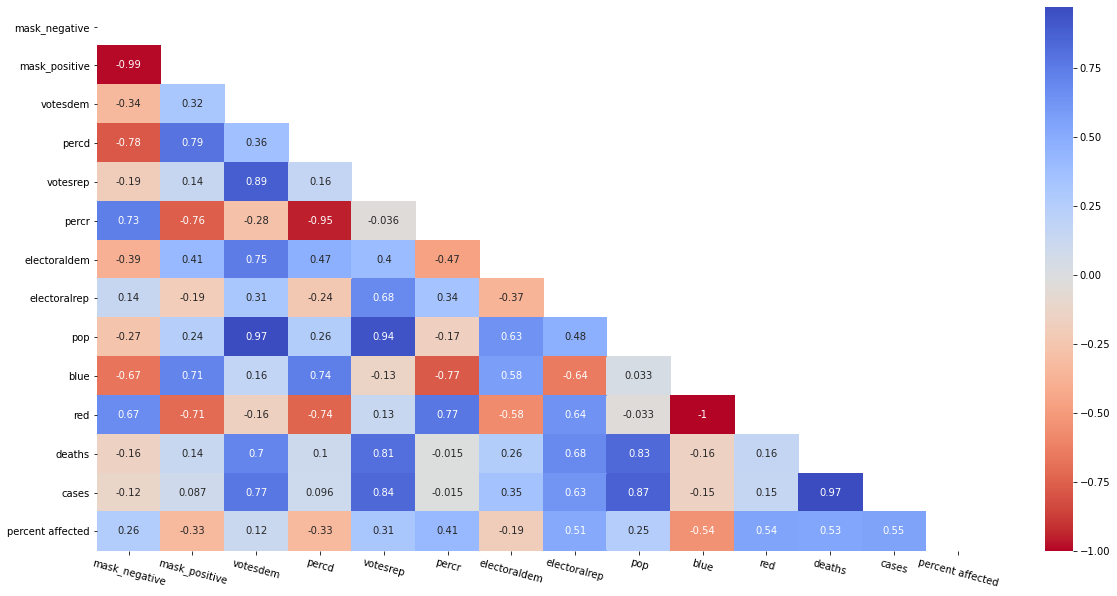

In [40]:
fancy_heatmap(df=data_covid_mask_political.drop(['never','rarely', 'sometimes', 'frequently', 'always'], axis=1))

In [41]:
(.84 - .77) / .77

0.09090909090909084

In [42]:
(.81 - .7) / .7

0.1571428571428573

In [44]:
# Mask Negative to Republican has a .73 correlation, .67 correlation to red
# Mask Positive to Democrat has a .79 correlation, .71 correlation to blue

# Covid cases have a .77 corelation with democrat
# Covid cases have a .84 correlation with republican
# States that reported republican have 9% higher covid cases, 15 % higher death rate

# engineered columns

# percent of population affected is .26 correlation with no mask
# percent of population affected is -0.33 correlation with mask

# percent of population affected is 0.41 correlation with republican
# percent of population affected is -0.33 correlation with democrat

In [45]:
df = data_covid_mask_political

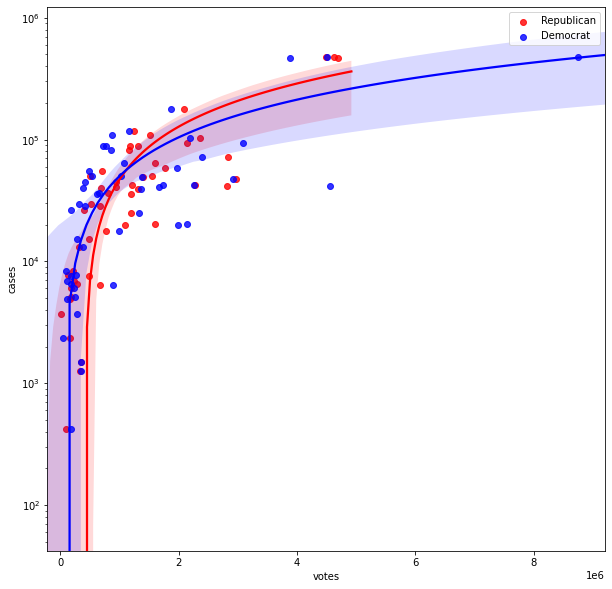

In [83]:
plt.figure(figsize=(10,10))
sns.regplot(x=df['votesrep'], y=df['cases'], label='Republican', color='red', truncate=False)
sns.regplot(x=df['votesdem'], y=df['cases'], label='Democrat', color='blue', truncate=False)
plt.xlabel('votes')
plt.yscale('log')
plt.legend();